In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import time
import datetime
import glob
import matplotlib.patches as mpatches



In [2]:
#this assumes only 1 ina file and 1 selenium file in directory!!!
testDirectoryName = "smallVSlarge_pingpong_jan14_round4/" #must end with a /
testDirectoryPath = "C:/Users/Alex/Documents/solarserver/aggregator/" + testDirectoryName
fileList = glob.glob(testDirectoryPath  + "*.csv")

print(testDirectoryPath)
fileList

C:/Users/Alex/Documents/solarserver/aggregator/smallVSlarge_pingpong_jan14_round4/


['C:/Users/Alex/Documents/solarserver/aggregator/smallVSlarge_pingpong_jan14_round4\\ina219-2020-01-14-1579048844.csv',
 'C:/Users/Alex/Documents/solarserver/aggregator/smallVSlarge_pingpong_jan14_round4\\selenium-2020-01-14-1579048847.csv']

In [3]:
inaFileName = [k for k in fileList if 'ina' in k]

inaFileName[0]

'C:/Users/Alex/Documents/solarserver/aggregator/smallVSlarge_pingpong_jan14_round4\\ina219-2020-01-14-1579048844.csv'

In [4]:
selFileName = [k for k in fileList if 'selenium' in k]

selFileName[0]

'C:/Users/Alex/Documents/solarserver/aggregator/smallVSlarge_pingpong_jan14_round4\\selenium-2020-01-14-1579048847.csv'

In [5]:
#For CSV files
inaData = pd.read_csv(inaFileName[0]).fillna(0)

In [6]:
print(inaData.shape)
inaData.head()

(10666, 3)


,mA,V,time
0,489.1,4.76,1.579049e+09
1,488.7,4.76,1.579049e+09
2,489.3,4.76,1.579049e+09
3,489.5,4.76,1.579049e+09
4,487.7,4.76,1.579049e+09


In [7]:
#add power
type(inaData)

pandas.core.frame.DataFrame

In [8]:
inaData.insert(2, 'watts', (inaData.mA / 1000.0) * inaData.V, True)

In [9]:
inaData.head()

,mA,V,watts,time
0,489.1,4.76,2.328116,1.579049e+09
1,488.7,4.76,2.326212,1.579049e+09
2,489.3,4.76,2.329068,1.579049e+09
3,489.5,4.76,2.330020,1.579049e+09
4,487.7,4.76,2.321452,1.579049e+09


In [10]:
#averages per second

inaLength = inaData.shape[0]
inaStartTime = inaData.time[0]
inaEndTime = inaData.time[inaData.shape[0]-1]
inaTimePeriod = inaEndTime - inaStartTime
dataPerSecond =inaLength/inaTimePeriod

dataPerSecond


15.237854761838854

In [11]:
averagedINA = pd.DataFrame(columns=['mA','V','watts','time'])

for av in list(range(int(inaTimePeriod))):
    avmA= inaData.loc[(15*av):((15*av)+14)]['mA'].sum()/15
    avV = inaData.loc[(15*av):((15*av)+14)]['V'].sum()/15
    avWatts = inaData.loc[(15*av):((15*av)+14)]['watts'].sum()/15
    avTime = inaData.loc[(15*av):(15*av)]['time'][inaData.loc[(15*av):(15*av)]['time'].index[0]]
    averagedINA = averagedINA.append({'mA' : avmA , 'V' : avV, 'watts': avWatts,'time': avTime},ignore_index=True)

    

In [12]:
print(averagedINA.shape)
print(averagedINA.tail())

(699, 4)
             mA     V     watts          time
694  489.880000  4.76  2.331829  1.579050e+09
695  488.940000  4.76  2.327354  1.579050e+09
696  488.933333  4.76  2.327323  1.579050e+09
697  489.366667  4.76  2.329385  1.579050e+09
698  488.493333  4.76  2.325228  1.579050e+09


In [13]:
seleniumData = pd.read_csv(selFileName[0]).fillna(0)


In [14]:
print(seleniumData.shape)
seleniumData.tail()

(198, 2)


,task,time
193,click,1.579049e+09
194,click,1.579049e+09
195,click,1.579049e+09
196,click,1.579049e+09
197,stop v2 3,1.579049e+09


In [15]:
seleniumData.task.loc[0]

'start v1 0'

In [16]:
# get start and stop times

testTimes = []

currentRound = 0
for getT in list(range(seleniumData.shape[0])):
    
    if 'start' in seleniumData.task.loc[getT]:
        roundTimes = [seleniumData.time.loc[getT]]
    elif 'stop' in seleniumData.task.loc[getT]:
        roundTimes.append(seleniumData.time.loc[getT])
        testTimes.append(roundTimes)
        
testTimes

[[1579048937.137068, 1579048965.2429485],
 [1579048995.2444992, 1579049021.972506],
 [1579049051.9783964, 1579049078.2065222],
 [1579049108.2101908, 1579049135.4068544],
 [1579049165.4165099, 1579049192.4521663],
 [1579049222.4607925, 1579049248.7481425],
 [1579049278.755115, 1579049305.8558779],
 [1579049335.8644855, 1579049363.2450533]]

In [17]:
#make new data frames with power data from only test durations

dataFrameSplits = []

#print(averagedINA)
for splitTests in list(range(len(testTimes))):
    dataFrameSplits.append(averagedINA.loc[(averagedINA.loc[:,'time']>=(testTimes[splitTests][0])) & (averagedINA.loc[:,'time']<=testTimes[splitTests][1])])
    #print(dataFrameSplits[splitTests])
    #print(averagedINA.loc[(averagedINA.loc[:,'time']>=(testTimes[splitTests][0])) & (averagedINA.loc[:,'time']<=testTimes[splitTests][1])])
print(len(dataFrameSplits))

dataFrameSplits

8


[             mA     V     watts          time
 95   489.253333  4.76  2.328846  1.579049e+09
 96   489.300000  4.76  2.329068  1.579049e+09
 97   489.300000  4.76  2.329068  1.579049e+09
 98   489.226667  4.76  2.328719  1.579049e+09
 99   510.600000  4.76  2.430456  1.579049e+09
 100  544.446667  4.76  2.591566  1.579049e+09
 101  502.940000  4.76  2.393994  1.579049e+09
 102  545.880000  4.76  2.598389  1.579049e+09
 103  530.600000  4.76  2.525656  1.579049e+09
 104  554.960000  4.76  2.641610  1.579049e+09
 105  550.126667  4.76  2.618603  1.579049e+09
 106  513.860000  4.76  2.445974  1.579049e+09
 107  543.126667  4.76  2.585283  1.579049e+09
 108  523.146667  4.76  2.490178  1.579049e+09
 109  525.833333  4.76  2.502967  1.579049e+09
 110  551.906667  4.76  2.627076  1.579049e+09
 111  551.373333  4.76  2.624537  1.579049e+09
 112  538.806667  4.76  2.564720  1.579049e+09
 113  509.766667  4.76  2.426489  1.579049e+09
 114  553.493333  4.76  2.634628  1.579049e+09
 115  538.646

In [18]:
#get the max and mins for each test set

for mX in list(range(len(dataFrameSplits))):
    print('------'+str(mX)+'------')
    print ('Max:')
    print (np.max(dataFrameSplits[mX].watts))
    print ('Min:')
    print (np.min(dataFrameSplits[mX].watts))
            

------0------
Max:
2.8766901333333337
Min:
2.3287189333333336
------1------
Max:
2.362165866666666
Min:
2.324942666666667
------2------
Max:
2.6577935999999993
Min:
2.3244666666666665
------3------
Max:
2.4174136000000006
Min:
2.3239272
------4------
Max:
2.9700178666666663
Min:
2.3245301333333335
------5------
Max:
2.363816
Min:
2.3238637333333334
------6------
Max:
3.1378237333333336
Min:
2.3263072
------7------
Max:
2.3612138666666667
Min:
2.325736


In [19]:
#obviously this isn't automated...

#large average peak
lPeakAVG =(2.6139504000000002 + 2.596789200000001 + 2.5888593333333336 + 2.6099552000000004) * 0.25

#small overall peak
sPeakAVG =(2.294001466666667+2.293759333333334+2.2986020000000003+2.2974821333333337)* 0.25

print("Large Peak AVG: " + str(lPeakAVG))
print("Small Peak AVG: " + str(sPeakAVG))

#peak differences
print("AVG Peak Difference: " + str(lPeakAVG-sPeakAVG))

Large Peak AVG: 2.602388533333334
Small Peak AVG: 2.2959612333333337
AVG Peak Difference: 0.3064273000000002


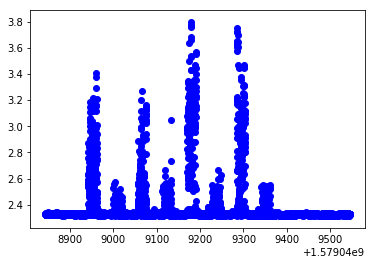

In [20]:

#graph ina219 all data
plt.scatter(x=inaData.loc[:,'time'], y=inaData.loc[:,'watts'], color='b')


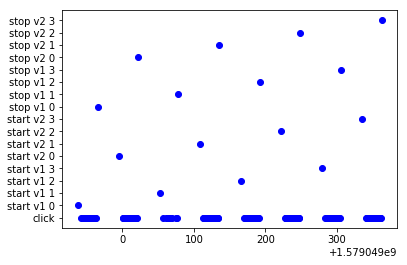

In [21]:
# graph all selenium data
plt.scatter(x=seleniumData.loc[:,'time'], y=seleniumData.loc[:,'task'], color='b')

C:/Users/Alex/Documents/solarserver/aggregator/smallVSlarge_pingpong_jan14_round4/voltage_2020-01-14-1579050104.png


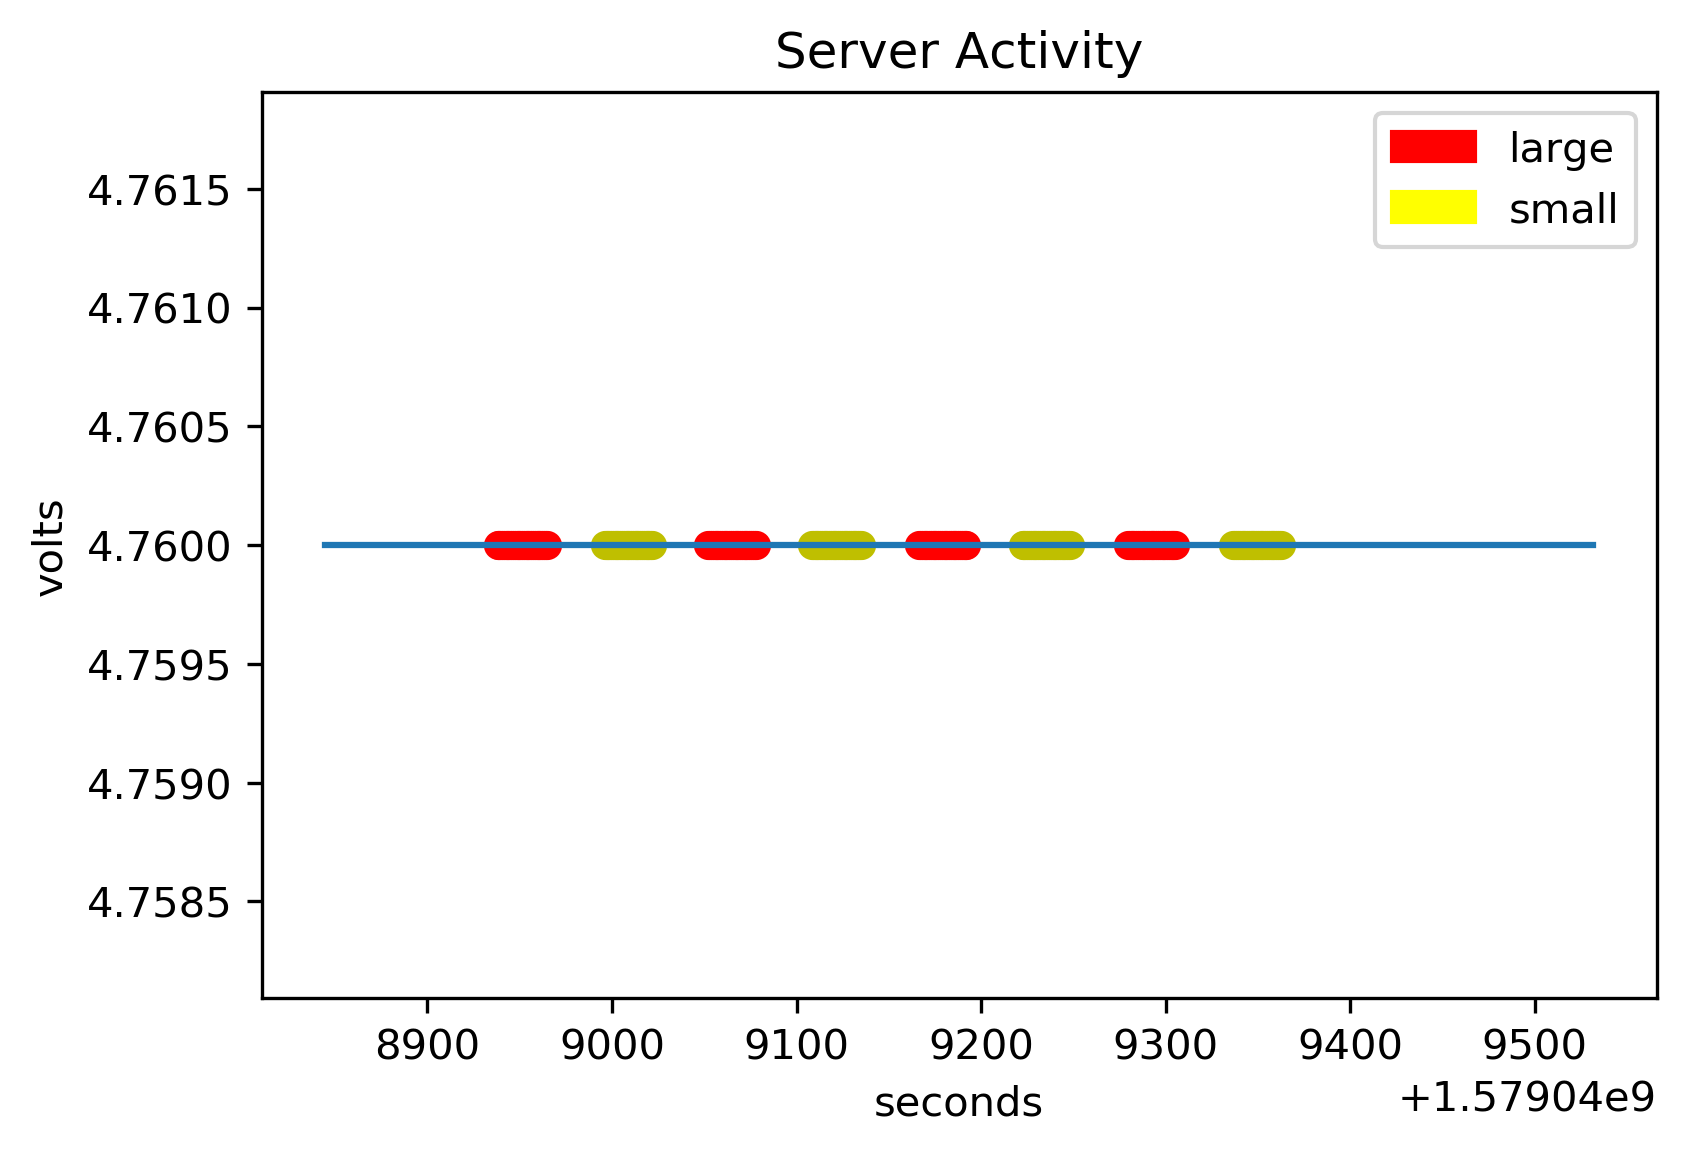

In [22]:
fig, ax = plt.subplots(dpi=300)

x = averagedINA.loc[:,'time']
y = averagedINA.loc[:,'V']
ax.plot(x,y)

ax.set(xlabel='seconds', ylabel='volts',
       title='Server Activity')

colors = ['r','y','b','g']
for plotNum in list(range(len(dataFrameSplits))):
    ax.scatter(x=dataFrameSplits[plotNum].loc[:,'time'], y=dataFrameSplits[plotNum].loc[:,'V'], color=colors[plotNum%2])

redLabel = mpatches.Patch(color='red', label='large')
blueLabel = mpatches.Patch(color='blue', label='small')
yellowLabel = mpatches.Patch(color='yellow', label='small')
greenLabel = mpatches.Patch(color='green', label='small image')


plt.legend(handles=[redLabel, yellowLabel])

#ax.grid()
pngName1 = testDirectoryPath +"voltage_"+str(datetime.date.today())+"-"+str(int(time.time()))+".png"
print(pngName1)
fig.savefig(pngName1)
plt.show()

C:/Users/Alex/Documents/solarserver/aggregator/smallVSlarge_pingpong_jan14_round4/current_2020-01-14-1579050106.png


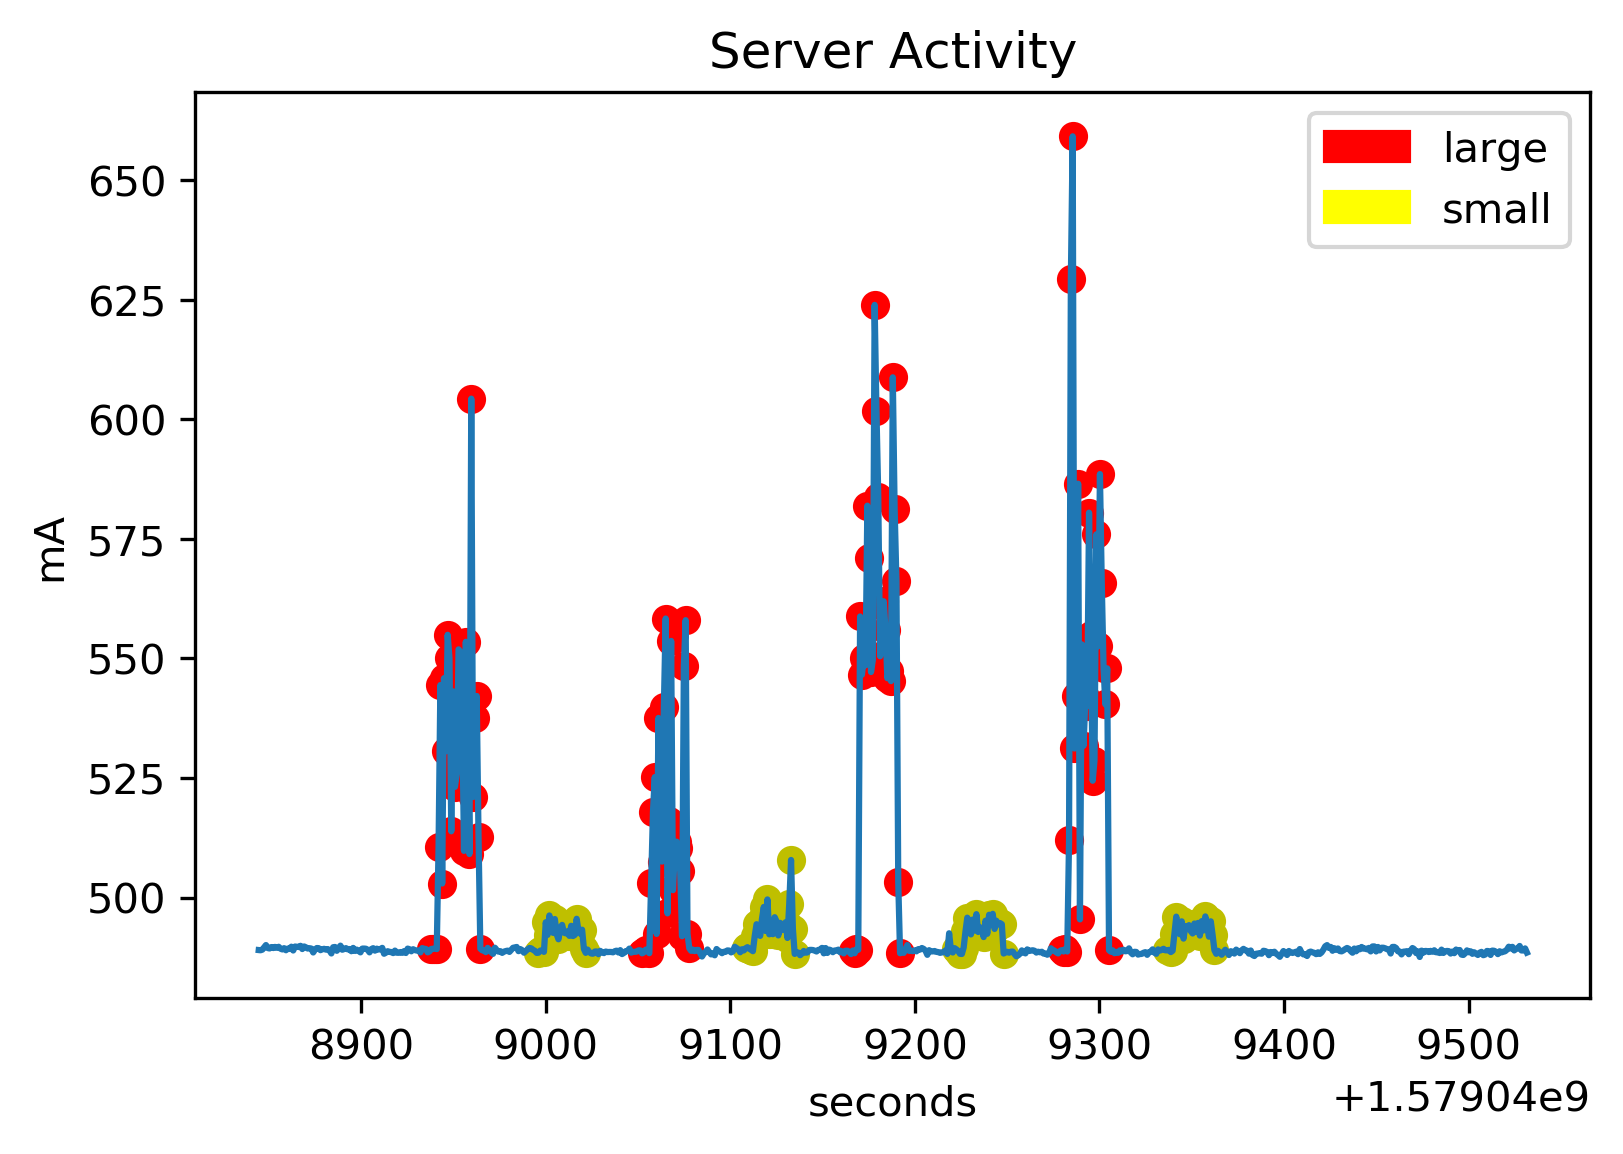

In [23]:
fig, ax = plt.subplots(dpi=300)

x = averagedINA.loc[:,'time']
y = averagedINA.loc[:,'mA']
ax.plot(x,y)

ax.set(xlabel='seconds', ylabel='mA',
       title='Server Activity')

colors = ['r','y','b','g']
for plotNum in list(range(len(dataFrameSplits))):
    ax.scatter(x=dataFrameSplits[plotNum].loc[:,'time'], y=dataFrameSplits[plotNum].loc[:,'mA'], color=colors[plotNum%2])

redLabel = mpatches.Patch(color='red', label='large')
blueLabel = mpatches.Patch(color='blue', label='large image')
yellowLabel = mpatches.Patch(color='yellow', label='small')
greenLabel = mpatches.Patch(color='green', label='small image')

plt.legend(handles=[redLabel, yellowLabel])

#ax.grid()
pngName1 = testDirectoryPath +"current_"+str(datetime.date.today())+"-"+str(int(time.time()))+".png"
print(pngName1)
fig.savefig(pngName1)
plt.show()

C:/Users/Alex/Documents/solarserver/aggregator/smallVSlarge_pingpong_jan14_round4/watts_2020-01-14-1579050109.png


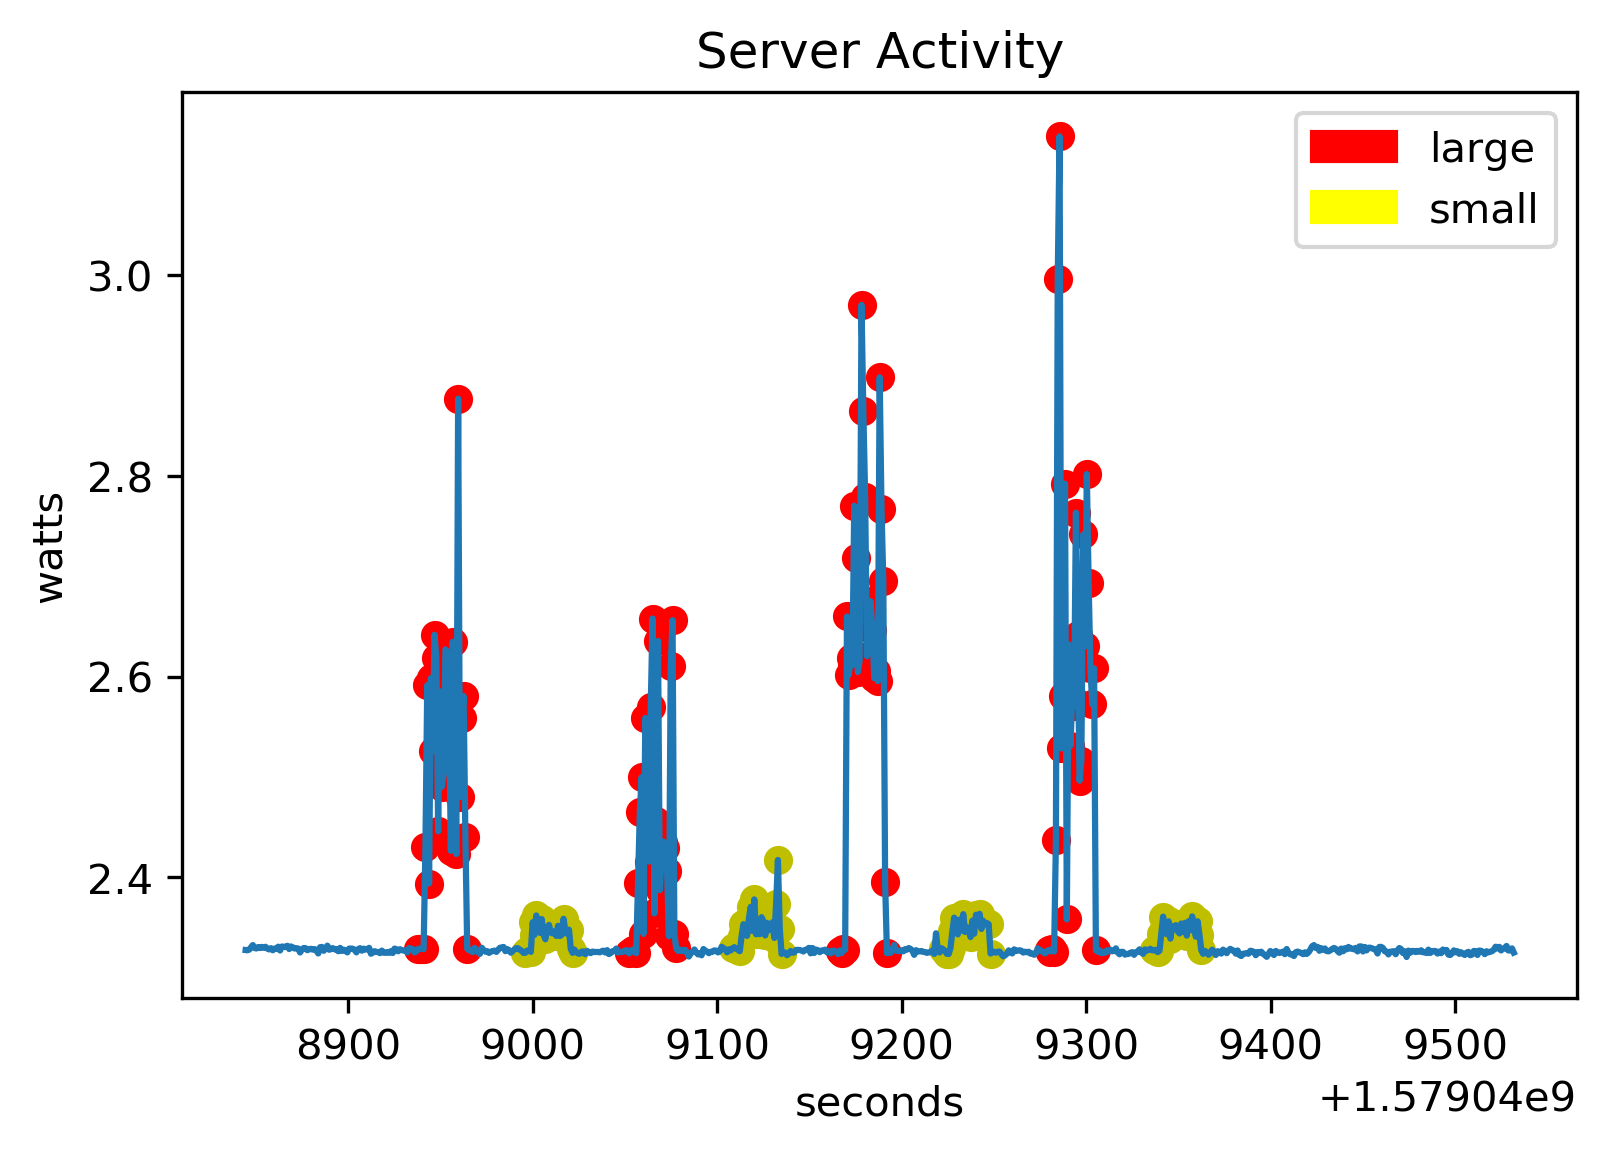

In [24]:
fig, ax = plt.subplots(dpi=300)

x = averagedINA.loc[:,'time']
y = averagedINA.loc[:,'watts']
ax.plot(x,y)

ax.set(xlabel='seconds', ylabel='watts',
       title='Server Activity')

colors = ['r','y','b','g']
for plotNum in list(range(len(dataFrameSplits))):
    ax.scatter(x=dataFrameSplits[plotNum].loc[:,'time'], y=dataFrameSplits[plotNum].loc[:,'watts'], color=colors[plotNum%2])

redLabel = mpatches.Patch(color='red', label='large')
blueLabel = mpatches.Patch(color='blue', label='large image')
yellowLabel = mpatches.Patch(color='yellow', label='small')
greenLabel = mpatches.Patch(color='green', label='small image')

plt.legend(handles=[redLabel, yellowLabel])

#ax.grid()
pngName1 = testDirectoryPath +"watts_"+str(datetime.date.today())+"-"+str(int(time.time()))+".png"
print(pngName1)
fig.savefig(pngName1)
plt.show()

In [25]:
overlayData = dataFrameSplits
overlayData[2]

,mA,V,watts,time
211,488.333333,4.76,2.324467,1.579049e+09
212,488.540000,4.76,2.325450,1.579049e+09
213,489.113333,4.76,2.328179,1.579049e+09
214,488.946667,4.76,2.327386,1.579049e+09
215,488.366667,4.76,2.324625,1.579049e+09
216,502.993333,4.76,2.394248,1.579049e+09
217,517.886667,4.76,2.465141,1.579049e+09
218,525.193333,4.76,2.499920,1.579049e+09
219,492.393333,4.76,2.343792,1.579049e+09
220,537.566667,4.76,2.558817,1.579049e+09


In [26]:
list(range(len(dataFrameSplits)))

[0, 1, 2, 3, 4, 5, 6, 7]

In [27]:
overlayData[0]

,mA,V,watts,time
95,489.253333,4.76,2.328846,1.579049e+09
96,489.300000,4.76,2.329068,1.579049e+09
97,489.300000,4.76,2.329068,1.579049e+09
98,489.226667,4.76,2.328719,1.579049e+09
99,510.600000,4.76,2.430456,1.579049e+09
100,544.446667,4.76,2.591566,1.579049e+09
101,502.940000,4.76,2.393994,1.579049e+09
102,545.880000,4.76,2.598389,1.579049e+09
103,530.600000,4.76,2.525656,1.579049e+09
104,554.960000,4.76,2.641610,1.579049e+09


In [28]:
for overlays in list(range(len(dataFrameSplits))):
    overlayData[overlays].insert(4, 'scaled', overlayData[overlays].time - overlayData[overlays].time[overlayData[overlays].time.index[0]], True)

#overlayData

C:/Users/Alex/Documents/solarserver/aggregator/smallVSlarge_pingpong_jan14_round4/aggregator_overlay-2020-01-14-1579050121.png


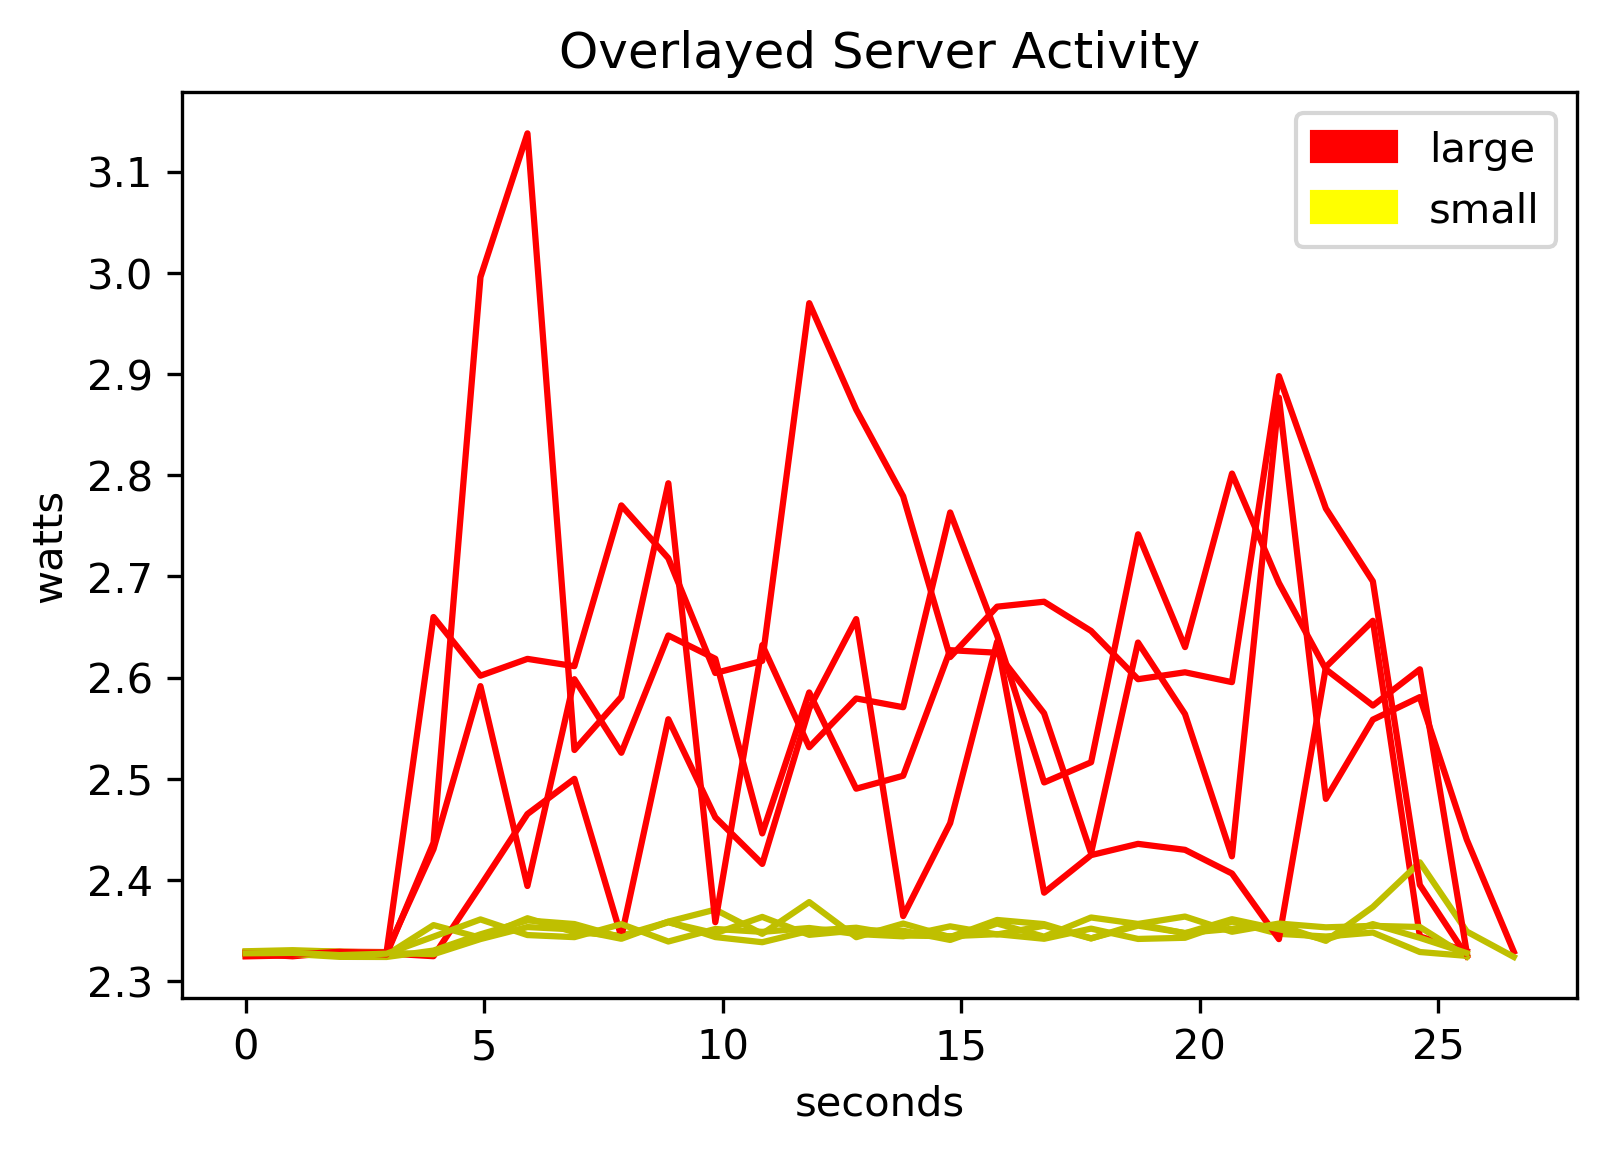

In [29]:
fig, ax = plt.subplots(dpi=300)
'''
x = overlayD1.loc[:,'scaled']
y = overlayD1.loc[:,'watts']
ax.plot(x,y, color='r')

ax.set(xlabel='time', ylabel='watts',
       title='Overlayed Server Activity')

'''

colors = ['r','y','b','g']
for plotNum in list(range(len(overlayData))):
    ax.plot(overlayData[plotNum].loc[:,'scaled'], overlayData[plotNum].loc[:,'watts'], color=colors[plotNum%2])

ax.set(xlabel='seconds', ylabel='watts',
       title='Overlayed Server Activity')

redLabel = mpatches.Patch(color='red', label='large')
blueLabel = mpatches.Patch(color='blue', label='large image')
yellowLabel = mpatches.Patch(color='yellow', label='small')
greenLabel = mpatches.Patch(color='green', label='small image')

plt.legend(handles=[redLabel, yellowLabel])

#ax.grid()
pngName2 = testDirectoryPath +"aggregator_overlay-"+str(datetime.date.today())+"-"+str(int(time.time()))+".png"
print(pngName2)
fig.savefig(pngName2)
plt.show()

In [30]:
#averages
averagedData = dataFrameSplits

In [31]:
averagedData[0].shape[0]

28

In [32]:
#find the shortest length of the data sets
dataLengths = []

for mins in list(range(len(overlayData))):
    dataLengths.append(averagedData[mins].shape[0])
minData = min(dataLengths)

minData

27

In [33]:
averagedData[2].watts.loc[averagedData[2].index[6]]

2.465140533333334

In [34]:
averagedData[0].head()

,mA,V,watts,time,scaled
95,489.253333,4.76,2.328846,1.579049e+09,0.000000
96,489.300000,4.76,2.329068,1.579049e+09,0.984469
97,489.300000,4.76,2.329068,1.579049e+09,1.968269
98,489.226667,4.76,2.328719,1.579049e+09,2.953568
99,510.600000,4.76,2.430456,1.579049e+09,3.938165


In [35]:
newAveragedDataL = []
newAveragedDataS = []

#loop through all data points
for sumum in list(range(minData)):
    #add up that data point for each set
    summedUp = []
    for getVal in list(range(int(len(averagedData)/2))):
        summedUp.append(averagedData[(getVal*2)].watts.loc[averagedData[(getVal*2)].index[sumum]])
    newAveragedDataL.append(np.mean(summedUp))
    
    summedUp = []
    for getVal in list(range(int(len(averagedData)/2))):
        summedUp.append(averagedData[(getVal*2)+1].watts.loc[averagedData[(getVal*2)+1].index[sumum]])
    newAveragedDataS.append(np.mean(summedUp))
    
print(newAveragedDataL)
print(newAveragedDataS)
    

[2.3270687999999997, 2.3263389333333335, 2.3286951333333334, 2.3276320666666668, 2.4629350666666667, 2.645846, 2.6538586666666664, 2.5594916666666667, 2.5551362666666666, 2.6776031333333337, 2.5108048000000003, 2.5275996666666667, 2.663949866666667, 2.648043533333333, 2.5542635999999996, 2.616659266666667, 2.642878933333334, 2.5308523333333333, 2.503347466666667, 2.6025696666666667, 2.5572624000000004, 2.5566832666666666, 2.702386866666667, 2.6164609333333333, 2.620506933333334, 2.4820385333333332, 2.355374933333333]
[2.3276162, 2.3281397999999998, 2.326569, 2.3262199333333333, 2.3390402, 2.3479096666666663, 2.3552797333333335, 2.3498454, 2.3465927333333334, 2.3536772, 2.353240866666667, 2.349329733333333, 2.3565332000000003, 2.3482190666666667, 2.3490124, 2.3456962666666668, 2.3524713333333334, 2.3492345333333335, 2.349813666666667, 2.3523840666666667, 2.350384866666667, 2.355136933333333, 2.3525903333333336, 2.3445380000000005, 2.3580643333333335, 2.3606268000000004, 2.33147973333333

In [38]:
# make a new data frame


someAveragedData = {'large' : newAveragedDataL ,'small' : newAveragedDataS , 'time': averagedData[4].loc[:,'scaled']}

averagedDF = pd.DataFrame(someAveragedData)


#get subsection
averagedDF = averagedDF.loc[(averagedDF.loc[:,'time']>= 4)  & (averagedDF.loc[:,'time'] <= 24)]

avgLarge = np.mean(averagedDF.large)
avgSmall = np.mean(averagedDF.small)

print("Average power draw of large image: " + str(avgLarge))
print("Average power draw of small image: " + str(avgSmall))

# Declare a list that is to be converted into a column 

averagedDF = averagedDF.assign(largeAVG=avgLarge)
averagedDF = averagedDF.assign(smallAVG=avgSmall)

#averagedDF

avgTimeInterval = averagedDF.iloc[-1].time-averagedDF.iloc[0].time
print("Time interval for averages: " + str(avgTimeInterval))

lPower = (avgLarge*1000)/avgTimeInterval
sPower = (avgSmall*1000)/avgTimeInterval
print("Large energy = " + str(lPower) + " milliwatt-seconds")
print("Small energy = " + str(sPower) + " milliwatt-seconds")
print("Large energy = " + str(lPower/3600) + " milliwatt-hours")
print("Small energy = " + str(sPower/3600) + " milliwatt-hours")

Average power draw of large image: 2.597310263333333
Average power draw of small image: 2.3509977166666665
Time interval for averages: 18.7059588432312
Large energy = 138.84935196856676 milliwatt-seconds
Small energy = 125.68175394641055 milliwatt-seconds
Large energy = 0.03856926443571299 milliwatt-hours
Small energy = 0.034911598318447375 milliwatt-hours


C:/Users/Alex/Documents/solarserver/aggregator/smallVSlarge_pingpong_jan14_round4/aggregator_averaged-2020-01-14-1579050165.png


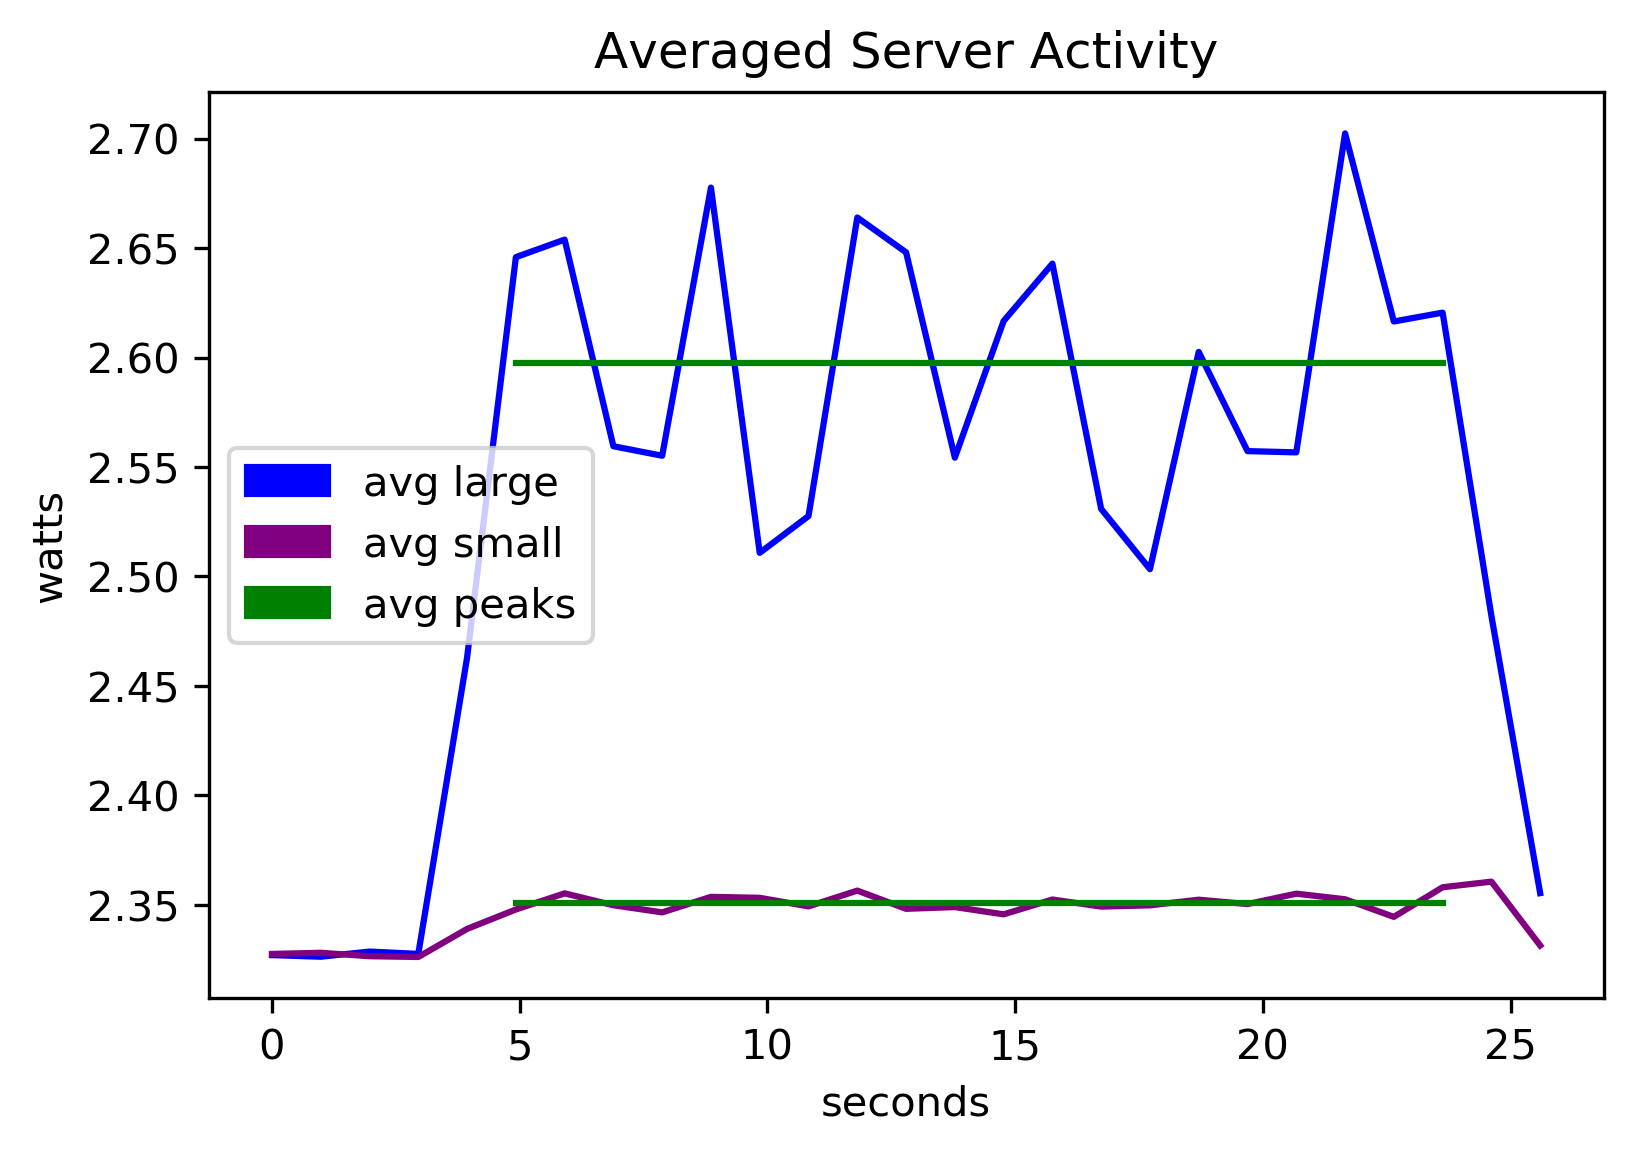

In [39]:
fig, ax = plt.subplots(dpi=300)


plt.plot(averagedData[4].loc[:,'scaled'], newAveragedDataL, color='b')
plt.plot(averagedData[4].loc[:,'scaled'], newAveragedDataS, color='purple')

plt.plot(averagedDF.loc[:,'time'], averagedDF.loc[:,'smallAVG'], color='g')
plt.plot(averagedDF.loc[:,'time'], averagedDF.loc[:,'largeAVG'], color='g')

ax.set(xlabel='seconds', ylabel='watts',
       title='Averaged Server Activity')

blueLabel = mpatches.Patch(color='blue', label='avg large')
greenLabel = mpatches.Patch(color='g', label='avg peaks')
yellowLabel = mpatches.Patch(color='purple', label='avg small')

plt.legend(handles=[blueLabel, yellowLabel, greenLabel])

#ax.grid()
pngName3 = testDirectoryPath +"aggregator_averaged-"+str(datetime.date.today())+"-"+str(int(time.time()))+".png"
print(pngName3)
fig.savefig(pngName3)
plt.show()


C:/Users/Alex/Documents/solarserver/aggregator/smallVSlarge_pingpong_jan14_round4/aggregator_overlay-2020-01-14-1579050172.png


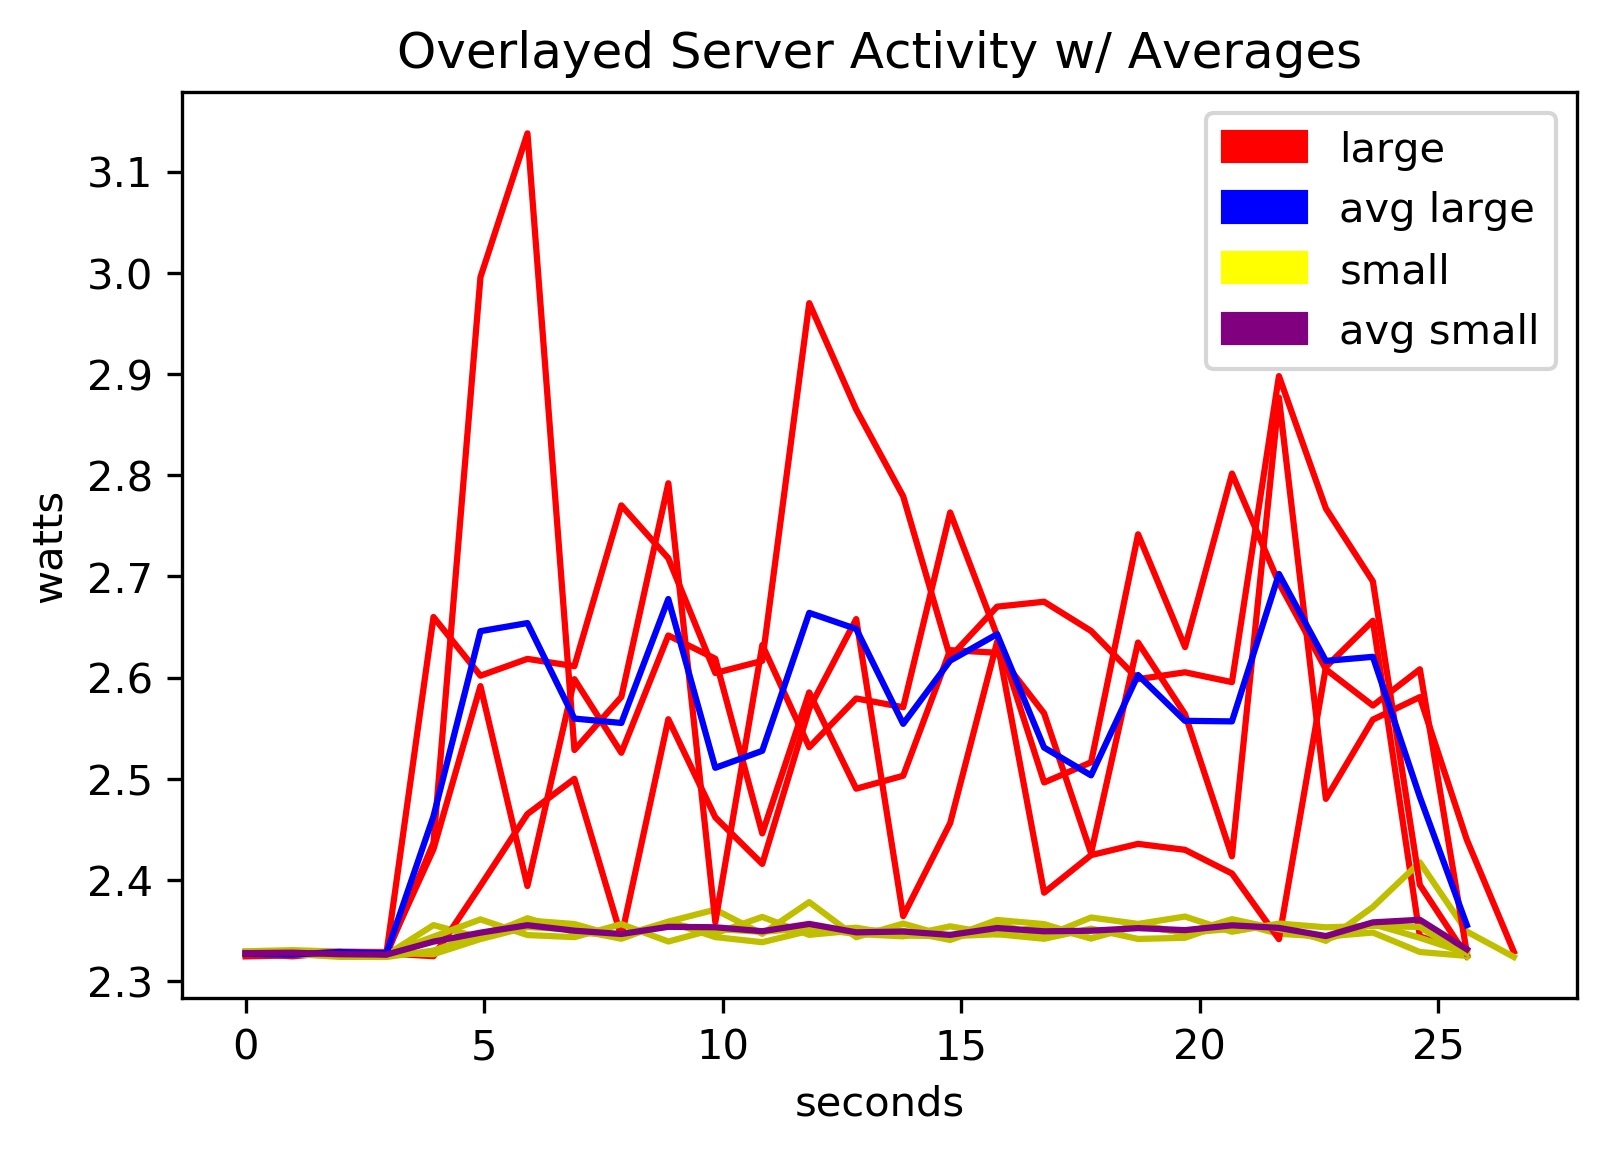

In [40]:
fig, ax = plt.subplots(dpi=300)

colors = ['r','y']
for plotNum in list(range(len(overlayData))):
    ax.plot(overlayData[plotNum].loc[:,'scaled'], overlayData[plotNum].loc[:,'watts'], color=colors[plotNum%2])

    
ax.plot(averagedData[4].loc[:,'scaled'], newAveragedDataL, color='b')
ax.plot(averagedData[4].loc[:,'scaled'], newAveragedDataS, color='purple')

ax.set(xlabel='seconds', ylabel='watts',
       title='Overlayed Server Activity w/ Averages')

#ax.scatter(x=overlayD1.loc[:,'scaled'], y=overlayD1.loc[:,'watts'], color='r')
#ax.plot(overlayS1.loc[:,'scaled'], overlayS1.loc[:,'watts'], color='y')

redLabel = mpatches.Patch(color='red', label='large')
blueLabel = mpatches.Patch(color='b', label='avg large')
yellowLabel = mpatches.Patch(color='yellow', label='small')
purpleLabel = mpatches.Patch(color='purple', label='avg small')

plt.legend(handles=[redLabel, blueLabel, yellowLabel, purpleLabel])

#ax.grid()
pngName2 = testDirectoryPath +"aggregator_overlay-"+str(datetime.date.today())+"-"+str(int(time.time()))+".png"
print(pngName2)
fig.savefig(pngName2)
plt.show()